In [1]:
import pandas as pd
import numpy as np

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['label'] = 0  
true['label'] = 1  

df = pd.concat([fake, true], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,BREAKING: Russia Scandal EXPLODES In Trump Ad...,Donald Trump and his entire administration see...,News,"February 13, 2017",0
1,Trump Is So Embarrassed His Candidate Lost He...,Donald Trump went all in for his man Luther St...,News,"September 27, 2017",0
2,‘Shoot Hillary In The F*ckin Head’: Conservat...,The new movie about the attack on the U.S. fac...,News,"January 15, 2016",0
3,Hannity Goes BALLISTIC After Conservative Gro...,It turns out that William F. Buckley s own son...,News,"July 21, 2017",0
4,LOL! GEORGE LOPEZ Booed Off Stage At Children’...,George Lopez was hired to be the emcee for the...,politics,"Oct 14, 2017",0


Dataset shape: (44898, 5)

Label distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


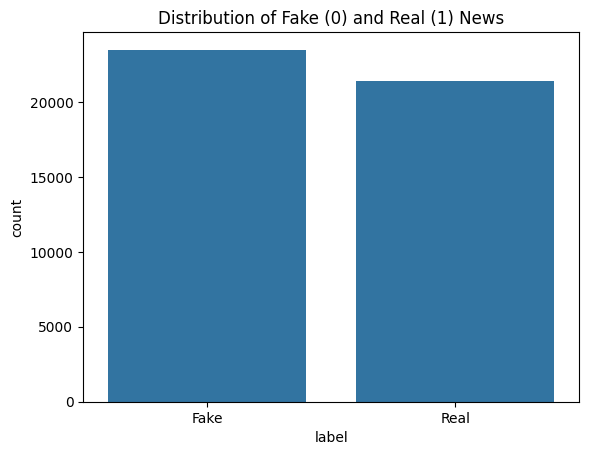

In [2]:
print("Dataset shape:", df.shape)
print("\nLabel distribution:\n", df['label'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [3]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()                             
    text = re.sub(r'\[.*?\]', '', text)             
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text)             
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', ' ', text)                
    text = re.sub(r'\w*\d\w*', '', text)           
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/talluriharishkumar3034/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,Donald Trump and his entire administration see...,donald trump entire administration seem nothin...
1,Donald Trump went all in for his man Luther St...,donald trump went man luther strange mean twee...
2,The new movie about the attack on the U.S. fac...,new movie attack us facility benghazi libya st...
3,It turns out that William F. Buckley s own son...,turns william f buckley son thrilled sean hann...
4,George Lopez was hired to be the emcee for the...,george lopez hired emcee children diabetes fou...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text']).toarray()

y = df['label']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (35918, 5000)
X_test shape : (8980, 5000)


In [7]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9876391982182628

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4694
           1       0.98      0.99      0.99      4286

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



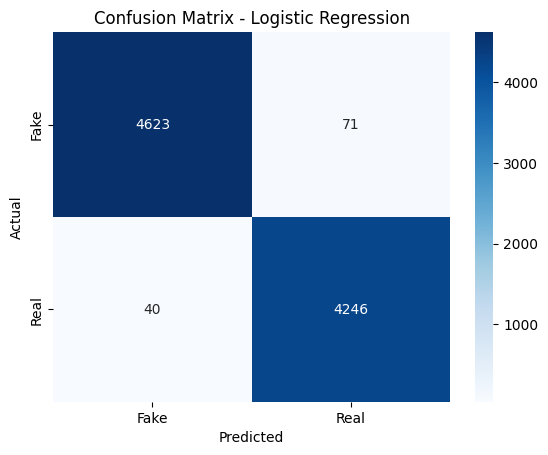

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 3000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])

X_seq = pad_sequences(sequences, maxlen=max_len)

y_seq = df['label'].values

from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

2025-07-26 10:17:56.084055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753525076.113022   31659 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753525076.121943   31659 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753525076.146014   31659 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753525076.146047   31659 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753525076.146049   31659 computation_placer.cc:177] computation placer alr

NameError: name 'df' is not defined

In [2]:
import pandas as pd
import numpy as np

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['label'] = 0  
true['label'] = 1  

df = pd.concat([fake, true], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,"Trump Ignores Historically Low Rating, Brags ...",The fact that most of the country despises Don...,News,"May 12, 2017",0
1,No Brexit deal would be 'a very bad deal' warn...,BERLIN (Reuters) - European Union chief Brexit...,worldnews,"November 29, 2017",1
2,Signs Saying ‘Future Internment Camp’ Are Pop...,Someone is going to empty lots and cordoned of...,News,"March 8, 2017",0
3,WATCH: Gun Nut Believes Trump’s ‘Second Amendm...,Donald Trump s Second Amendment threat just ...,News,"August 10, 2016",0
4,Italy likely to hold national elections on Mar...,ROME (Reuters) - Italy s parliament will be di...,worldnews,"December 13, 2017",1


Dataset shape: (44898, 5)

Label distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


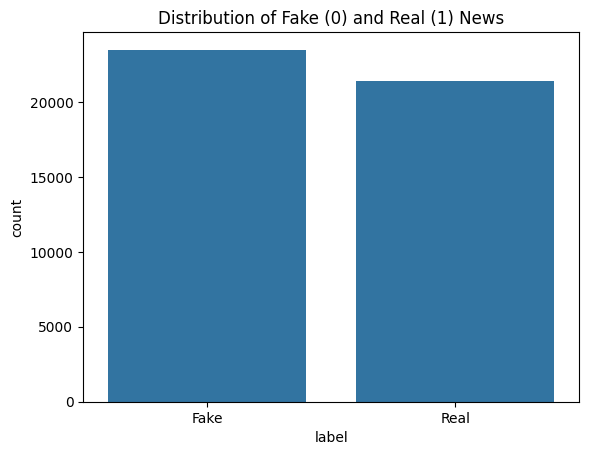

In [3]:
print("Dataset shape:", df.shape)
print("\nLabel distribution:\n", df['label'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [4]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()                             
    text = re.sub(r'\[.*?\]', '', text)             
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text)             
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', ' ', text)                
    text = re.sub(r'\w*\d\w*', '', text)           
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/talluriharishkumar3034/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,The fact that most of the country despises Don...,fact country despises donald trump voted secre...
1,BERLIN (Reuters) - European Union chief Brexit...,berlin reuters european union chief brexit neg...
2,Someone is going to empty lots and cordoned of...,someone going empty lots cordoned buildings ar...
3,Donald Trump s Second Amendment threat just ...,donald trump second amendment threat took frig...
4,ROME (Reuters) - Italy s parliament will be di...,rome reuters italy parliament dissolved christ...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text']).toarray()

y = df['label']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (35918, 5000)
X_test shape : (8980, 5000)


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9889755011135858

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4724
           1       0.99      0.99      0.99      4256

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



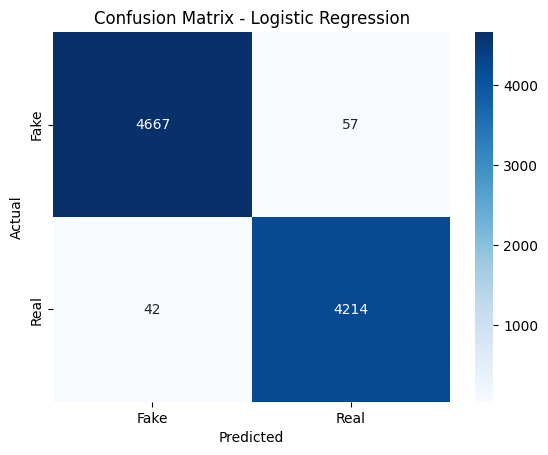

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [2]:
import pandas as pd
import numpy as np

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['label'] = 0  
true['label'] = 1  

df = pd.concat([fake, true], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,Puerto Rico’s Governor Pleads For Help After ...,Donald Trump took his angry little fingers to ...,News,"October 12, 2017",0
1,AMTRAK FACTS AND WHY AMERICANS SHOULDN’T TRUST...,The Democrats didn t waste any time pushing fo...,politics,"May 15, 2015",0
2,Former Trump adviser Flynn pleads guilty to ly...,WASHINGTON (Reuters) - Former U.S. national se...,politicsNews,"December 1, 2017",1
3,Ramaphosa's ANC election win lifts South Afric...,JOHANNESBURG (Reuters) - South African banking...,worldnews,"December 19, 2017",1
4,BREAKING: Desperate GOP Senators Drag John Mc...,"By now, we all know that upon having emergency...",News,"July 24, 2017",0


Dataset shape: (44898, 5)

Label distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


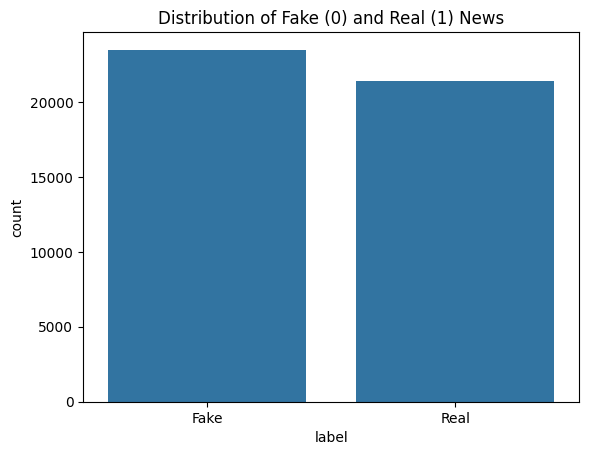

In [3]:
print("Dataset shape:", df.shape)
print("\nLabel distribution:\n", df['label'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [4]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()                             
    text = re.sub(r'\[.*?\]', '', text)             
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text)             
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', ' ', text)                
    text = re.sub(r'\w*\d\w*', '', text)           
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/talluriharishkumar3034/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,Donald Trump took his angry little fingers to ...,donald trump took angry little fingers twitter...
1,The Democrats didn t waste any time pushing fo...,democrats waste time pushing funding amtrak ph...
2,WASHINGTON (Reuters) - Former U.S. national se...,washington reuters former us national security...
3,JOHANNESBURG (Reuters) - South African banking...,johannesburg reuters south african banking sto...
4,"By now, we all know that upon having emergency...",know upon emergency surgery remove blood clot ...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text']).toarray()

y = df['label']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (35918, 5000)
X_test shape : (8980, 5000)


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9888641425389755

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



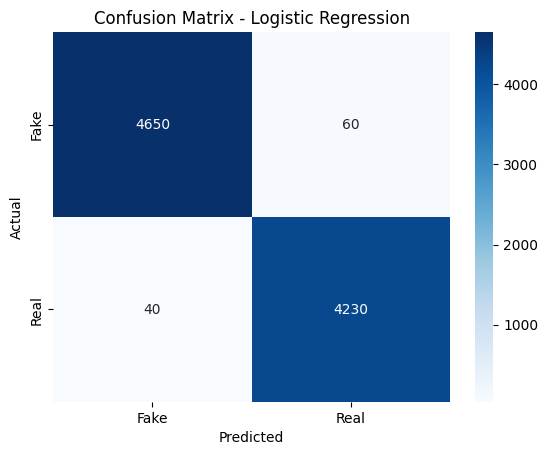

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 3000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])

X_seq = pad_sequences(sequences, maxlen=max_len)

y_seq = df['label'].values

from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=3000, output_dim=64, input_length=300))
model.add(LSTM(32))                  
model.add(Dropout(0.3))              
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_dl, y_train_dl, epochs=3, batch_size=32, validation_split=0.2)

NameError: name 'X_train_dl' is not defined

In [3]:
import pandas as pd
import numpy as np

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['label'] = 0  
true['label'] = 1  

df = pd.concat([fake, true], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,CHRIS WALLACE Has This One Thing To Say About ...,Pretty interesting comment from a once skeptic...,politics,"Oct 18, 2015",0
1,Trump trade officials prefer tri-lateral NAFTA...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 16, 2017",1
2,U.S. follows Mexico in backing disputed Hondur...,WASHINGTON/TEGUCIGALPA (Reuters) - The United ...,worldnews,"December 20, 2017",1
3,Ivanka Trump Tweets About Dead Syrian Childre...,"Ivanka Trump s father, the man who calls himse...",News,"April 7, 2017",0
4,"Trump, Cruz tensions may provide liveliest Rep...","CHARLESTON, S.C./MANCHESTER, N.H. (Reuters) - ...",politicsNews,"January 14, 2016",1


Dataset shape: (44898, 5)

Label distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


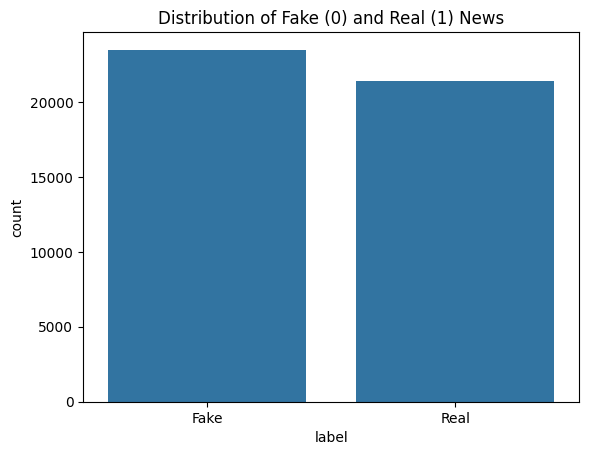

In [4]:
print("Dataset shape:", df.shape)
print("\nLabel distribution:\n", df['label'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [5]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()                             
    text = re.sub(r'\[.*?\]', '', text)             
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>+', '', text)             
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', ' ', text)                
    text = re.sub(r'\w*\d\w*', '', text)           
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/talluriharishkumar3034/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,Pretty interesting comment from a once skeptic...,pretty interesting comment skeptical fox news ...
1,WASHINGTON (Reuters) - The Trump administratio...,washington reuters trump administration’s top ...
2,WASHINGTON/TEGUCIGALPA (Reuters) - The United ...,washingtontegucigalpa reuters united states we...
3,"Ivanka Trump s father, the man who calls himse...",ivanka trump father man calls president united...
4,"CHARLESTON, S.C./MANCHESTER, N.H. (Reuters) - ...",charleston scmanchester nh reuters flaring tem...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text']).toarray()

y = df['label']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (35918, 5000)
X_test shape : (8980, 5000)


In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9900890868596882

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4685
           1       0.99      0.99      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



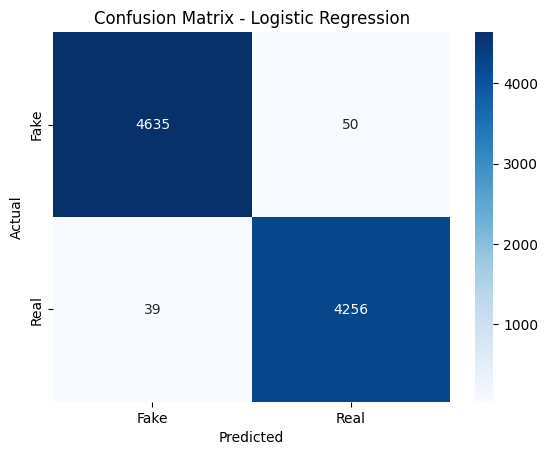

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 2000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])

X_seq = pad_sequences(sequences, maxlen=max_len)

y_seq = df['label'].values

from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
X_seq = pad_sequences(sequences, maxlen=max_len)
y_seq = df['label'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/miniconda/envs/python3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8881 - loss: 0.2335 - val_accuracy: 0.9844 - val_loss: 0.0500
Epoch 2/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9878 - loss: 0.0413 - val_accuracy: 0.9864 - val_loss: 0.0439


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9877 - loss: 0.0429
Test Accuracy: 0.9876391887664795


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4685
           1       0.99      0.98      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



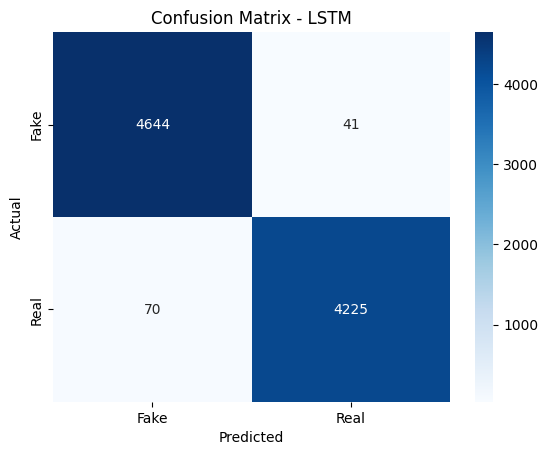

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LSTM')
plt.show()

In [18]:
model.save("lstm_fake_news_model.h5")

In [19]:
from tensorflow.keras.models import load_model
model = load_model("lstm_fake_news_model.h5")

In [20]:
model.save("lstm_fake_news_model.keras")

In [21]:
from tensorflow.keras.models import load_model

model = load_model("lstm_fake_news_model.h5")  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

loss, acc = model.evaluate(X_test, y_test)
print("Restored model accuracy:", acc)

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9877 - loss: 0.0429
Restored model accuracy: 0.9876391887664795


In [22]:
y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype("int32")

for i in range(10):
    print(f"Predicted: {y_pred[i][0]}, Actual: {y_test[i]}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1


In [23]:
sample = tokenizer.texts_to_sequences(["Breaking: New vaccine developed for virus"])
sample = pad_sequences(sample, maxlen=max_len)
prediction = model.predict(sample)
print("Prediction:", "Fake" if prediction < 0.5 else "Real")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: Fake


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4685
           1       0.99      0.98      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



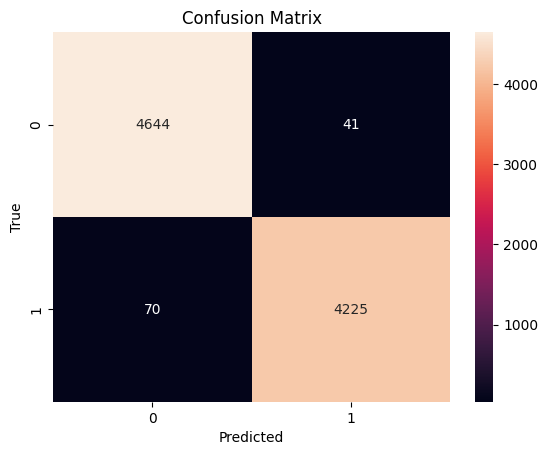

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
sample_texts = ["The government announces new policies to boost the economy.",
                "Shocking news! Aliens have landed in the White House."]

sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_pad = pad_sequences(sample_seq, maxlen=max_len) 

preds = model.predict(sample_pad)

for text, pred in zip(sample_texts, preds):
    label = "Real" if pred >= 0.5 else "Fake"
    print(f"{label} ({pred[0]:.2f}): {text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Fake (0.02): The government announces new policies to boost the economy.
Fake (0.00): Shocking news! Aliens have landed in the White House.


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(df['text'])
y = df['label'].map({'REAL': 1, 'FAKE': 0}) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ValueError: Input y contains NaN.

In [30]:
print("Total rows:", len(df))

empty_texts = df['text'].isna().sum() + (df['text'].str.strip() == '').sum()
print("Empty or NaN text rows:", empty_texts)

print(df['text'].head(5))

Total rows: 0
Empty or NaN text rows: 0
Series([], Name: text, dtype: object)


Final shape after combining & cleaning: (44267, 5)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4585
           1       0.98      0.98      0.98      4269

    accuracy                           0.98      8854
   macro avg       0.98      0.98      0.98      8854
weighted avg       0.98      0.98      0.98      8854



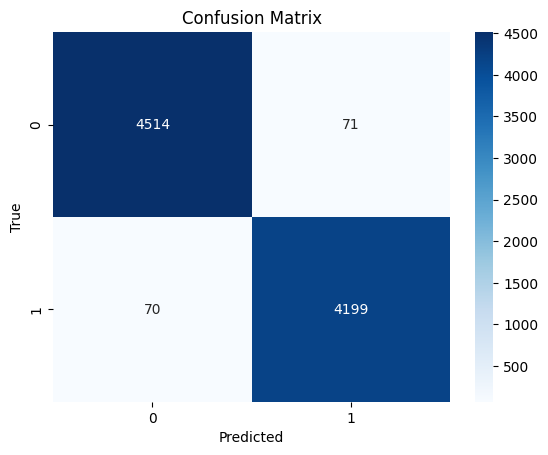

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fake = pd.read_csv("/home/talluriharishkumar3034/Fake.csv")
true = pd.read_csv("/home/talluriharishkumar3034/True.csv")

fake['label'] = 0
true['label'] = 1

df = pd.concat([fake, true], ignore_index=True)

df = df.dropna(subset=['text'])
df = df[df['text'].str.strip().astype(bool)]

print("Final shape after combining & cleaning:", df.shape)

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()